In [97]:
#Moroney(1951) showed that goals per game is well described by a Poisson distribution
#As such, we will use a Poisson distribution here
#From previous touraments, the av goals per game is 2.34, or 1.17 goals per team per match

import numpy as np
import pandas as pd

#Function for subtracting one array from another
def subtract(L1,L2):
    return [x1-x2 for x1,x2 in zip(L1,L2)]

#Creating a function to create a random game
#Input is goals per game per team, output is the random score
def game_predictor(goalspgpt):
    score = np.random.poisson(goalspgpt,2);
    return score

#Function for assigning the result of a match
#Input is the score, output is result_output
#result_output = [home_points, away_points]
def result_assigner(score):
    result_output = [0,0];
    
    #If statements for home win, draw and away win
    if score[0] > score[1]: #home win
        result_output[0] = 3; 
    elif score[0] == score[1]: #draw
        result_output[0] = 1; result_output[1] = 1;
    elif score[0] < score[1]:#away win
        result_output[1] = 3;
        
    return result_output   


#Function for predicting the outcome of the group
# Input is goals per game per team, output is
def group_predictor(goalspgpt, team_points_positions, agnst_goals_positions):
    game_results = np.array([game_predictor(goalspgpt) for i in range(6)]);
    points_array = np.array([result_assigner(game_results[i]) for i in range(6)]);
         
    full_points_array = [sum(points_array[tuple(team_points_positions[i])]) for i in range(4)];
    goals_for = [sum(game_results[tuple(team_points_positions[i])]) for i in range(4)];
    goals_against = [sum(game_results[tuple(agnst_goals_positions[i])]) for i in range(4)];
    goal_diff = subtract(goals_for,goals_against);

    return full_points_array, goals_for, goals_against, goal_diff

#Function for putting the results into a group table
def group_table(fpa,gf,ga,gd):
    final_group_table = np.transpose([
        fpa,
        gf,
        ga,
        gd
    ]); #Making an nd-array of the data
    
    final_group_df = pd.DataFrame(final_group_table,
                                 columns = ['Points',
                                            'Goals_For',
                                            'Goals_Against',
                                            'Goal_Difference']);
    
    return final_group_df


#Function for obtaining the 3rd place team results
def third_place_team(fpa,gf,ga,gd):
    
    final_group_df = group_table(fpa,gf,ga,gd) # Import the group table
    #Sort the group table by points, then goal difference, then goals for, and then taking the 3rd best team for this
    third_place = final_group_df.sort_values(['Points', 'Goal_Difference', 'Goals_For']).iloc[1];
        
    return third_place
    
    
#Function for simulating the third place team out of 6 groups, and finding the 4th best of those teams
def third_place_tournament(goals_pg_pt, team_points_positions, agnst_goals_positions):
    
    #Creating a data frame for the 3rd best teams
    tournament_3rd_place_df = pd.DataFrame(columns = ['Points',
                                            'Goals_For',
                                            'Goals_Against',
                                            'Goal_Difference']);
    
    #Simulating 6 groups in a tourament
    for i in range(6):
        fpa, goals_for, goals_against, goal_diff = group_predictor(goals_pg_pt,team_points_positions,agnst_goals_positions);
        tournament_3rd_place_df = tournament_3rd_place_df.append(third_place_team(fpa, goals_for, goals_against, goal_diff));
   
    #Finding the 4th best 3rd place team
    fourth_best_3rd_place = tournament_3rd_place_df.sort_values(['Points', 'Goal_Difference', 'Goals_For']).iloc[2];

    return fourth_best_3rd_place


#Function for simulating the tourament many times, and obtaining the 4th place teams info
def multi_tournament_simulator(goals_pg_pt, team_points_positions, agnst_goals_positions, n_repetitions):
    
    #Creating a dataframe of the 4th best teams
    fourth_best_teams_df = pd.DataFrame(columns = ['Points',
                                            'Goals_For',
                                            'Goals_Against',
                                            'Goal_Difference']);
    for i in range(n_repetitions):
        fourth_best_teams_df = fourth_best_teams_df.append(third_place_tourament(goals_pg_pt,team_points_positions,agnst_goals_positions));
    
    return fourth_best_teams_df
    
    
#Variables used for coding  
goals_pg_pt = 1.1714658444022772; #Goals per game per team
team_points_positions = [[[0,1,2],[0,0,0]],
                         [[0,3,4],[1,0,0]],
                         [[1,3,5],[1,1,0]],
                         [[2,4,5],[1,1,1]]]; #array to assign the different teams the points

agnst_goals_positions = [[[0,1,2],[1,1,1]],
                         [[0,3,4],[0,1,1]],
                         [[1,3,5],[0,0,1]],
                         [[2,4,5],[0,0,0]]]; #array for the goals against positions

#Games are; A-B, A-C, A-D, B-C, B-D, C-D



In [96]:
third_place_tourament(goals_pg_pt,team_points_positions,agnst_goals_positions)

Points              3
Goals_For           3
Goals_Against       5
Goal_Difference    -2
Name: 0, dtype: object

In [163]:
#Running the code 1000 times, and obtaining the data
n_reps = 1000

fourth_best_teams_df = multi_tournament_simulator(goals_pg_pt, team_points_positions, agnst_goals_positions, n_reps);

fourth_best_teams_df = fourth_best_teams_df.astype(str).astype(int)

499.0

The median of the 4th best teams is;
Points             3
Goals_For          5
Goals_Against      6
Goal_Difference   -1
Name: 2, dtype: int32


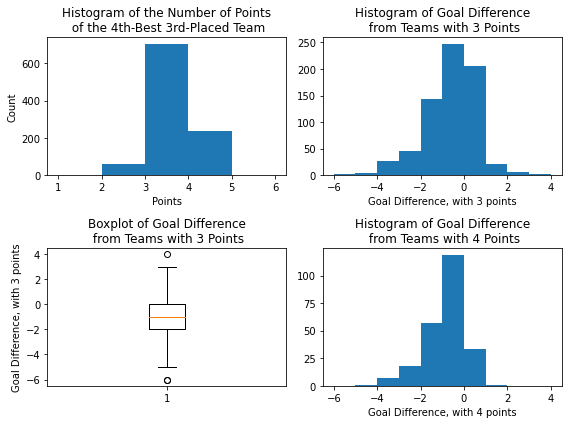

In [172]:
#Data analysis
from matplotlib.pyplot import subplots

median_4th_best_team = fourth_best_teams_df.sort_values(['Points', 'Goal_Difference', 'Goals_For']).iloc[int((n_reps/2) - 1)];

print('The median of the 4th best teams is;\n', median_4th_best_team,sep = '');

#Creating the subplots
fig, ax = subplots(ncols = 2, nrows = 2, figsize = (8,6));

#Plot 1 - histogram of the number of points
ax[0,0].hist(fourth_best_teams_df['Points'], bins = [1,2,3,4,5,6]);
ax[0,0].set(xlabel='Points', ylabel='Count');
ax[0,0].set(title = 'Histogram of the Number of Points\n of the 4th-Best 3rd-Placed Team');

#Plot 2, histogram of the goal difference for 3 points
ax[0,1].hist(fourth_best_teams_df[fourth_best_teams_df['Points'] == 3]['Goal_Difference'],
            bins = [-6,-5,-4,-3,-2,-1,0,1,2,3,4]);
ax[0,1].set(xlabel ='Goal Difference, with 3 points');
ax[0,1].set(title = 'Histogram of Goal Difference\n from Teams with 3 Points');

#Plot 3, boxplot of the goal difference for 3 points
ax[1,0].boxplot(fourth_best_teams_df[fourth_best_teams_df['Points'] == 3]['Goal_Difference']);
ax[1,0].set(ylabel ='Goal Difference, with 3 points');
ax[1,0].set(title = 'Boxplot of Goal Difference\n from Teams with 3 Points');

#Plot 4, the histograms for goal difference with 2 and 4 points
#ax[1,1].hist(fourth_best_teams_df[fourth_best_teams_df['Points'] == 2]['Goal_Difference']);
ax[1,1].hist(fourth_best_teams_df[fourth_best_teams_df['Points'] == 4]['Goal_Difference'],
            bins = [-6,-5,-4,-3,-2,-1,0,1,2,3,4]);
ax[1,1].set(xlabel ='Goal Difference, with 4 points');
ax[1,1].set(title = 'Histogram of Goal Difference\n from Teams with 4 Points');

fig.tight_layout()

#fourth_best_teams_df[fourth_best_teams_df['Points'] == 3]['Goal_Difference'].describe()